## Importing Libraries & getting Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import make_classification 
X, y = make_classification(n_classes=2, n_samples=400, n_features=2,n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

In [4]:
# in svm, we have y = -1 or 1, but here we have y = 0 or 1
# convert all y = 0 to y= -1

y[y == 0] = -1

## Custom Implementation of SVM

In [5]:
class CustomSVM:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0


    def hinge_loss(self ,w,b,X,y):
        loss = 0.0 
        loss += 0.5 * np.dot(w ,w.T)

        for i in range(X.shape[0]):
            ti = y[i] * (np.dot(w ,X[i].T) + b)
            loss += self.c * max(0 ,1-ti)

        return loss[0][0]


    def fit(self ,X ,y , batch_size =100,lr=0.01 ,max_iterations =300 ):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        n = lr
        c = self.c 

        # initializing model parameters
        w = np.zeros((1,n_features))
        bias = 0 

        losses = []

        for i in range(max_iterations):
            l = self.hinge_loss(w , bias ,X ,y)
            losses.append(l)

            # for batch-size ,getting random points 
            ids =np.arange(n_samples)
            np.random.shuffle(ids)

            # gradient-descent batch wise 
            for batch_jump in range(0 ,n_samples , batch_size):
                grad_w =0
                grad_b =0

                for j in range(batch_jump ,batch_jump + batch_size):
                    if j < n_samples:
                        i = ids[j]
                        ti = y[i] * (np.dot(w ,X[i].T) + bias)

                        if ti >= 1:
                            grad_w = 0
                            grad_b = 0
                        else : 
                            grad_w += c * X[i]*y[i]
                            grad_b += c * y[i]

                w = w - n * w + n * grad_w
                bias = bias + n * grad_b 
        
        self.w = w 
        self.b = bias 
        return w ,bias ,losses

## Model

In [6]:
model = CustomSVM(c=10)
w, b, losses = model.fit(X, y, max_iterations=100)

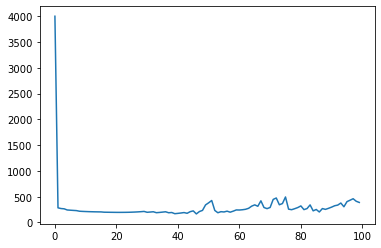

In [8]:
plt.plot(losses)

## Plotting the HyperPlane

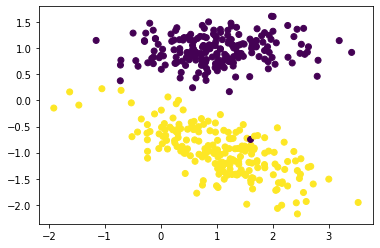

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [10]:
def hyperplane(w1 ,w2 ,b):
    plt.figure(figsize=(10,10))
    x1 = np.linspace(-2,2,10)
    x2 = -(w1 * x1 +b) / w2

    x_pos = -(w1 * x1 + b + 1)/w2
    x_neg = -(w1 * x1 + b - 1)/w2

    plt.plot(x1, x2, label="WX+B=0")
    plt.plot(x1, x_pos, label="WX+B=1")
    plt.plot(x1, x_neg, label="WX+B=-1")
    plt.legend()

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()


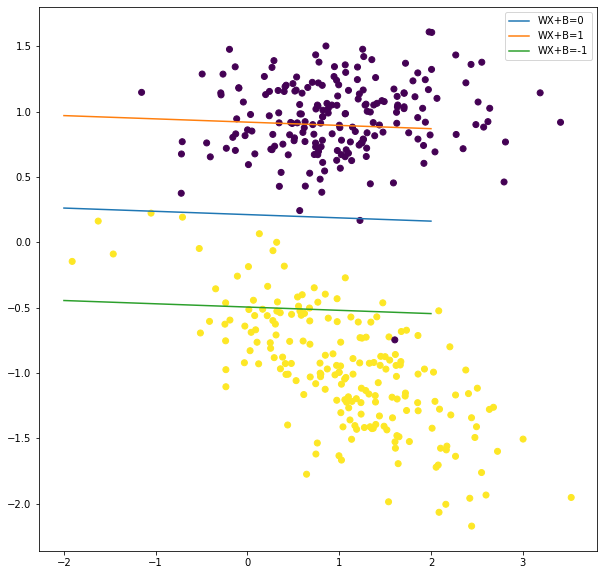

In [11]:
hyperplane(w[0,0] ,w[0,1] ,b)